In [30]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from reglas import validar_conexion

In [31]:
df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19236\4054734974.py:1: SyntaxWarning: invalid escape sequence '\T'
  df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')
C:\Users\Admin\AppData\Local\Temp\ipykernel_19236\4054734974.py:1: DtypeWarning: Columns (12,13,16,17,19,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')


In [32]:
df['tipo_prenda'].unique()

array(['cardigan', 'pant', 'sweater', 'jacket', 'shirt', 'top', 'tshirt',
       'jeans', 'dress', 'scarf', 'skirt', 'jumpsuit', 'parka',
       'sweatshirt', 'coat', 'bag', 'short', 'jean', 't-shirt', 'shorts',
       'playsuit', 'foulard', 'jakect', 'trench', 'jackect', 'pullover',
       'falda', 't-shit', 'l', 'fular'], dtype=object)

In [33]:
df['ID_color'] = df['ID'] + df['Color']

prendas = df['ID_color'].unique().tolist()
len(prendas)

5405

In [34]:
df_grafo = df[['ID_color', 'nivel', 'Color', 'color_nivel', 'Temporada', 'Marca', 'ID']]
df_grafo = df_grafo.drop_duplicates()
df_grafo['ID_nuevo'] = [i for i in range(1, len(df_grafo)+1)]

In [35]:
df_grafo

ID_color  nivel      Color  \
0           5f5c4a50-557a-4d53-9e81-cc72fdd18fbfblack      2      black   
75          5f5c4a50-557a-4d53-9e81-cc72fdd18fbfbeige      2      beige   
100          5f5c4a50-557a-4d53-9e81-cc72fdd18fbfrust      2       rust   
375           6e6b4255-006a-4d13-b312-3b1426290d8ered      1        red   
495        6549c1b1-989e-432a-bdc9-b603c438b310yellow      2     yellow   
...                                               ...    ...        ...   
620301     50701dda-a3f4-4b59-8698-da3757382574yellow      2     yellow   
620347       50701dda-a3f4-4b59-8698-da3757382574pink      2       pink   
620462        22efc184-5ecb-401d-8dea-9569ceae492dred      1        red   
620485     22efc184-5ecb-401d-8dea-9569ceae492dpurple      1     purple   
620600  98c51c8b-c467-4025-9517-806334bc8680blue_dark      1  blue_dark   

        color_nivel  Temporada     Marca  \
0                 0          8  BRAND119   
75               46          8  BRAND119   
100              30          8  BRAND119   
375              12          7  BRAND117   
495              54          9  BRAND119   
...             ...        ...       ...   
620301           54          9   BRAND15   
620347           15          9   BRAND15   
620462           12          9   BRAND15   
620485          112          9   BRAND15   
620600          100          7   BRAND54   

                                          ID  ID_nuevo  
0       5f5c4a50-557a-4d53-9e81-cc72fdd18fbf         1  
75      5f5c4a50-557a-4d53-9e81-cc72fdd18fbf         2  
100     5f5c4a50-557a-4d53-9e81-cc72fdd18fbf         3  
375     6e6b4255-006a-4d13-b312-3b1426290d8e         4  
495     6549c1b1-989e-432a-bdc9-b603c438b310         5  
...                                      ...       ...  
620301  50701dda-a3f4-4b59-8698-da3757382574      5690  
620347  50701dda-a3f4-4b59-8698-da3757382574      5691  
620462  22efc184-5ecb-401d-8dea-9569ceae492d      5692  
620485  22efc184-5ecb-401d-8dea-9569ceae492d      5693  
620600  98c51c8b-c467-4025-9517-806334bc8680      5694  

[5694 rows x 8 columns]

In [36]:
colores = ['red', 'blue', 'green']

color_nodo = [colores[i-1] for i in df_grafo['nivel']]

In [37]:
df_grafo[:20]

ID_color  nivel       Color  \
0          5f5c4a50-557a-4d53-9e81-cc72fdd18fbfblack      2       black   
75         5f5c4a50-557a-4d53-9e81-cc72fdd18fbfbeige      2       beige   
100         5f5c4a50-557a-4d53-9e81-cc72fdd18fbfrust      2        rust   
375          6e6b4255-006a-4d13-b312-3b1426290d8ered      1         red   
495       6549c1b1-989e-432a-bdc9-b603c438b310yellow      2      yellow   
518         6549c1b1-989e-432a-bdc9-b603c438b310ecru      2        ecru   
564    6549c1b1-989e-432a-bdc9-b603c438b310blue_dark      2   blue_dark   
840    dace6963-7e84-4cef-a153-3c6fb29cc7c3blue_dark      3   blue_dark   
918        dace6963-7e84-4cef-a153-3c6fb29cc7c3black      3       black   
1100  d6679919-7a49-4edd-bd04-982289d0e8acgreen_dark      2  green_dark   
1156       d6679919-7a49-4edd-bd04-982289d0e8accamel      2       camel   
1268       350b09b1-9156-468f-a7e8-b99cec0d6f6eblack      1       black   
1352   350b09b1-9156-468f-a7e8-b99cec0d6f6eblue_dark      1   blue_dark   
1380  350b09b1-9156-468f-a7e8-b99cec0d6f6egray_light      1  gray_light   
1436       350b09b1-9156-468f-a7e8-b99cec0d6f6ekhaki      1       khaki   
1520       350b09b1-9156-468f-a7e8-b99cec0d6f6ebrown      1       brown   
1968       965805d4-5a1a-4779-a42a-b10866deef3dblack      2       black   
2093      f7b1efdf-c846-4ee2-8454-19c628097adbindigo      2      indigo   
2218       1612cad7-b3ff-4c18-91d5-237795578050white      2       white   
2302       1612cad7-b3ff-4c18-91d5-237795578050black      2       black   

      color_nivel  Temporada     Marca                                    ID  \
0               0          8  BRAND119  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   
75             46          8  BRAND119  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   
100            30          8  BRAND119  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   
375            12          7  BRAND117  6e6b4255-006a-4d13-b312-3b1426290d8e   
495            54          9  BRAND119  6549c1b1-989e-432a-bdc9-b603c438b310   
518            51          9  BRAND119  6549c1b1-989e-432a-bdc9-b603c438b310   
564           100          9  BRAND119  6549c1b1-989e-432a-bdc9-b603c438b310   
840           100          8   BRAND15  dace6963-7e84-4cef-a153-3c6fb29cc7c3   
918             0          8   BRAND15  dace6963-7e84-4cef-a153-3c6fb29cc7c3   
1100           70          8    BRAND4  d6679919-7a49-4edd-bd04-982289d0e8ac   
1156           41          8    BRAND4  d6679919-7a49-4edd-bd04-982289d0e8ac   
1268            0          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
1352          100          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
1380            2          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
1436            0          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
1520           30          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
1968            0          9  BRAND167  965805d4-5a1a-4779-a42a-b10866deef3d   
2093          113          9  BRAND167  f7b1efdf-c846-4ee2-8454-19c628097adb   
2218            4          9   BRAND91  1612cad7-b3ff-4c18-91d5-237795578050   
2302            0          9   BRAND91  1612cad7-b3ff-4c18-91d5-237795578050   

      ID_nuevo  
0            1  
75           2  
100          3  
375          4  
495          5  
518          6  
564          7  
840          8  
918          9  
1100        10  
1156        11  
1268        12  
1352        13  
1380        14  
1436        15  
1520        16  
1968        17  
2093        18  
2218        19  
2302        20

In [38]:
prendas_c =df_grafo[:1000].set_index('ID_nuevo').to_dict('index')
G_corto = nx.Graph()
G_corto.add_nodes_from(prendas_c)


In [39]:
import itertools

for id_A, id_B in itertools.combinations(prendas_c.keys(), 2):
    prenda_A = prendas_c[id_A]
    prenda_B = prendas_c[id_B]

    if validar_conexion(prenda_A, prenda_B):
        G_corto.add_edge(id_A, id_B)


In [40]:
len(G_corto.edges)

96008

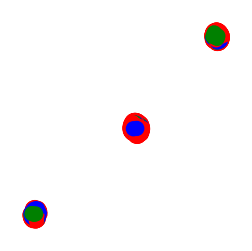

In [41]:
fig, ax = plt.subplots(figsize = (3,3))

color_nodo1000 = [colores[i-1] for i in df_grafo['nivel'][:1000]]
nx.draw(G_corto, node_color=color_nodo1000, node_size=100,width=1)

In [48]:
# Diccionario: {ID_nodo : color}
color_nodo = {
    row.ID_nuevo: colores[row.nivel - 1]
    for _, row in df_grafo.iterrows()
}


In [49]:
faltan = [n for n in G_corto.nodes if n not in color_nodo]
faltan


[]

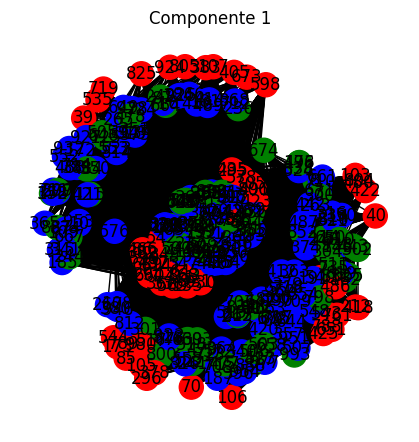

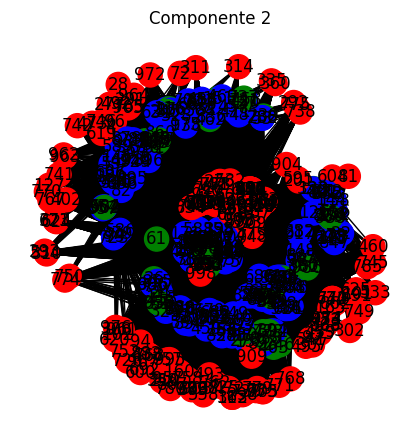

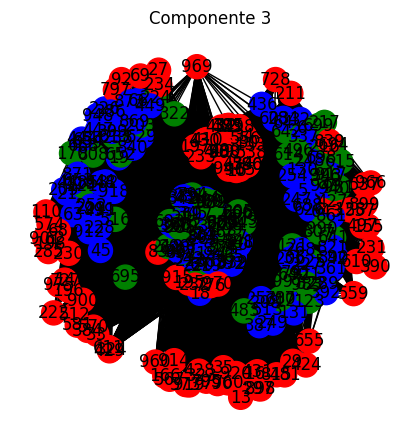

In [50]:
componentes = nx.connected_components(G_corto)

for i, comp in enumerate(componentes):
    subG = G_corto.subgraph(comp)

    # lista de colores SOLO para los nodos del subgrafo
    colores_sub = [color_nodo[n] for n in subG.nodes()]

    plt.figure(figsize=(4, 4))
    nx.draw(
        subG,
        with_labels=True,
        node_size=300,
        node_color=colores_sub  # ← Aquí metemos la lista
    )
    plt.title(f"Componente {i+1}")
    plt.show()


In [16]:
triangulos = [c for c in nx.cycle_basis(G_corto) if len(c) == 3]
triangulos


[[22, 998, 1000],
 [23, 998, 1000],
 [24, 998, 1000],
 [25, 998, 1000],
 [26, 998, 1000],
 [46, 998, 1000],
 [47, 998, 1000],
 [48, 998, 1000],
 [49, 998, 1000],
 [50, 998, 1000],
 [51, 998, 1000],
 [52, 998, 1000],
 [53, 998, 1000],
 [54, 998, 1000],
 [55, 998, 1000],
 [56, 998, 1000],
 [57, 998, 1000],
 [58, 998, 1000],
 [59, 998, 1000],
 [60, 998, 1000],
 [61, 998, 1000],
 [74, 998, 1000],
 [75, 998, 1000],
 [76, 998, 1000],
 [77, 998, 1000],
 [78, 998, 1000],
 [79, 998, 1000],
 [82, 998, 1000],
 [84, 998, 1000],
 [88, 998, 1000],
 [98, 998, 1000],
 [99, 998, 1000],
 [104, 998, 1000],
 [112, 998, 1000],
 [116, 998, 1000],
 [117, 998, 1000],
 [118, 998, 1000],
 [126, 998, 1000],
 [129, 998, 1000],
 [132, 998, 1000],
 [133, 998, 1000],
 [134, 998, 1000],
 [138, 998, 1000],
 [139, 998, 1000],
 [143, 998, 1000],
 [144, 998, 1000],
 [145, 998, 1000],
 [148, 998, 1000],
 [149, 998, 1000],
 [150, 998, 1000],
 [151, 998, 1000],
 [152, 998, 1000],
 [156, 998, 1000],
 [157, 998, 1000],
 [158,

In [28]:
G_corto.edges()

EdgeView([(1, 8), (1, 9), (1, 10), (1, 11), (2, 8), (2, 9), (2, 11), (3, 9), (3, 11), (5, 12), (5, 15), (5, 17), (5, 18), (5, 20), (6, 12), (6, 15), (6, 17), (6, 18), (6, 20), (7, 12), (7, 15), (7, 17), (7, 18), (7, 20), (8, 11), (9, 10), (9, 11), (12, 17), (12, 18), (12, 19), (12, 20), (13, 17), (13, 18), (13, 20), (14, 17), (14, 18), (14, 19), (14, 20), (15, 17), (15, 18), (15, 19), (15, 20), (16, 17), (16, 20), (17, 18), (17, 19), (17, 20), (18, 19), (18, 20)])

In [35]:
G = nx.Graph()
G.add_nodes_from(prendas)


In [36]:
fig, ax = plt.subplots(figsize = (100, 100))

nx.draw(G, node_color=color_nodo)

In [14]:
estampados = df[df['Caracteristica1']== 'print']['Caracteristica'].unique()

In [15]:
for i, est in enumerate(estampados):
    print(i, ': ', est)

0 :  smooth
1 :  floral
2 :  sheets
3 :  animal_print
4 :  horizontal_stripes
5 :  bodoque
6 :  vertical_stripes
7 :  miniprint
8 :  retro
9 :  herringbone
10 :  polka_dot
11 :  printed
12 :  checked
13 :  ethnic
14 :  cachemere
15 :  pied_de_poule
16 :  geometric
17 :  other
18 :  liberty
19 :  mariniere
20 :  tie_dye
21 :  tropical
22 :  army
23 :  gradient
24 :  two_tone
25 :  vichy
26 :  camouflage
27 :  prince_of_wales
28 :  rhombus_fabric
29 :  diagonal_stripe
30 :  tartan
31 :  tapestry


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

# 1. Preparar los datos CRUDOS
# Importante: Neo4j falla si hay valores NaN (nulos) de pandas.
# Rellenamos los nulos con cadenas vacías o un valor por defecto.
df_limpio = df.fillna("")

# Convertimos a lista de diccionarios (cada fila es un diccionario)
datos_para_neo4j = df_limpio.to_dict('records')

# 2. Configuración
URI = "bolt://localhost:7687"
AUTH = ("neo4j", "contra")

# 3. La Query Inteligente (Aquí está la magia)
query_acumulativa = """
UNWIND $batch_data AS row
MERGE (p:Prenda {id: row.ID})

// ESTO OCURRE SOLO LA PRIMERA VEZ QUE VEMOS EL ID
ON CREATE SET 
    p.titulo = row.Titulo,
    p.color = row.Color,
    p.temporada = row.Temporada,
    // Inicializamos la lista con el primer elemento que encontramos
    p.caracteristicas = [row.Caracteristica]

// ESTO OCURRE LAS VECES SIGUIENTES (FILAS REPETIDAS)
ON MATCH SET
    // Solo añadimos a la lista si el valor no está vacío y no lo hemos añadido ya (para evitar duplicados exactos)
    p.caracteristicas = CASE 
        WHEN NOT row.Caracteristica IN p.caracteristicas 
        THEN p.caracteristicas + [row.Caracteristica]
        ELSE p.caracteristicas 
    END
"""

# 4. Ejecutar
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    with driver.session() as session:
        session.run(query_acumulativa, batch_data=datos_para_neo4j)
        print(f"Procesadas {len(datos_para_neo4j)} filas. Los nodos han ido acumulando sus atributos.")

ServiceUnavailable: Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión)